In [1]:
dataset = "data/Coco"
version = "2017"

In [2]:
import torch
import torch.utils.data as data
from python.data.dataset import *
from python.models.generator import UNet
from python.models.discriminator import PatchGAN
from python.utils.images import *
from python.train.trainer import *
from tqdm.notebook import tqdm
from python.eval.evaluation import Evalutation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = UNet(1, 2)
generator.load_state_dict(torch.load("saves/cGan_100_R1/saved_models/generator_best_10", map_location=device))

<All keys matched successfully>

In [3]:
dataset_val= CocoLab(dataset, splits="test", version=version, size=256)
val_loader = data.DataLoader(dataset_val, batch_size=5, shuffle=True, num_workers=2)

In [4]:
generator.train()

UNet(
  (model): Sequential(
    (0): UNetModule(
      (inner_module): UNetModule(
        (inner_module): UNetModule(
          (inner_module): UNetModule(
            (inner_module): UNetModule(
              (inner_module): UNetModule(
                (inner_module): UNetModule(
                  (inner_module): UNetModule(
                    (down): Down(
                      (down): Sequential(
                        (0): LeakyReLU(negative_slope=0.2, inplace=True)
                        (1): Conv2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
                      )
                    )
                    (up): Up(
                      (up): Sequential(
                        (0): ReLU(inplace=True)
                        (1): ConvTranspose2d(512, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
                        (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                    

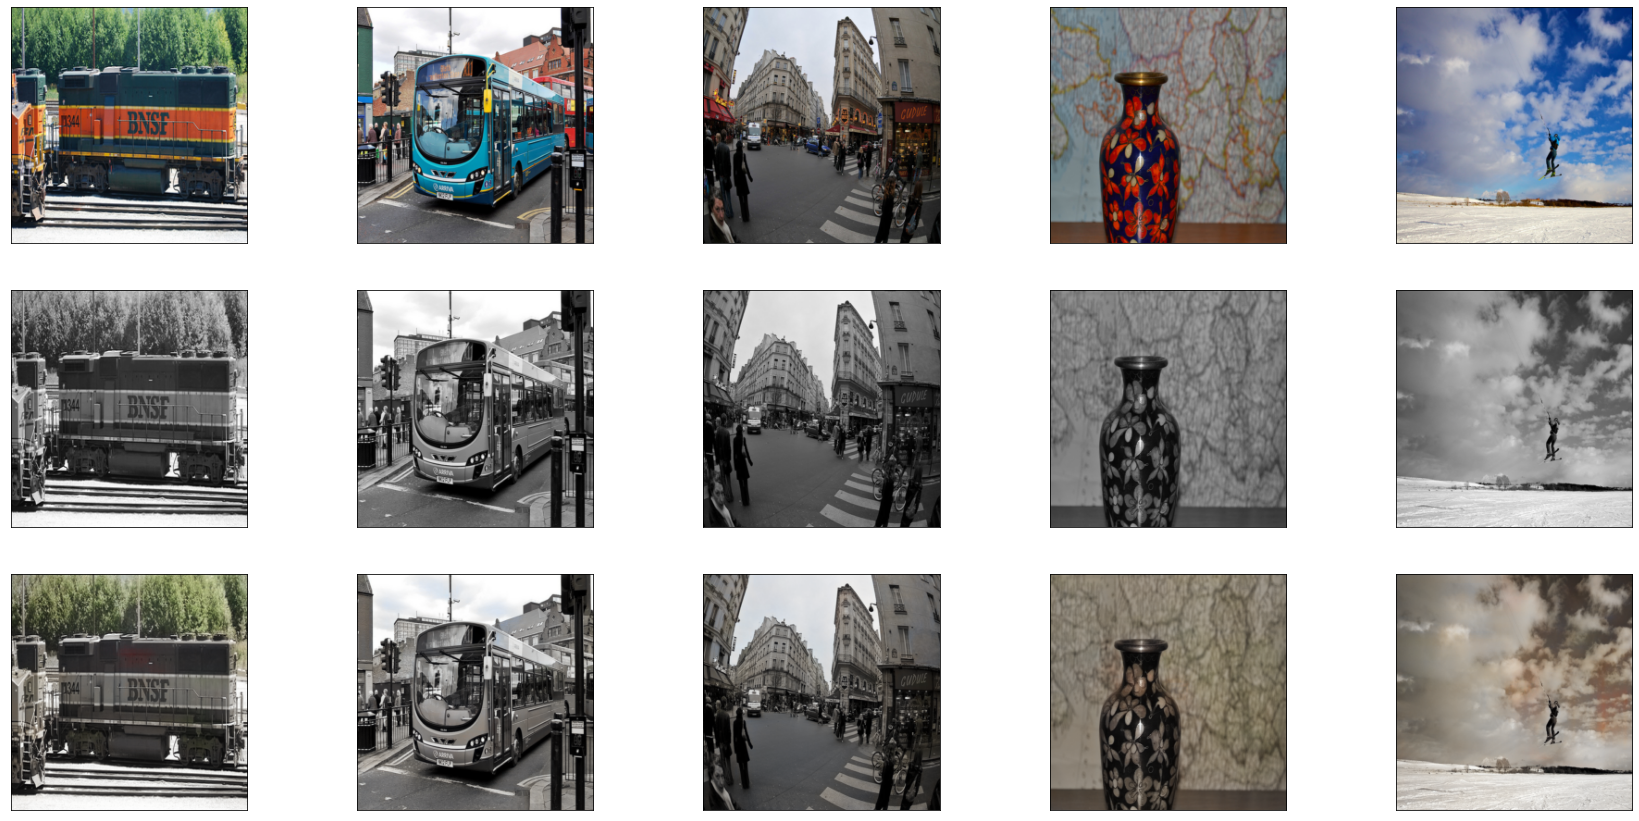

In [41]:
multi_plot(val_loader, generator, columns=5)

In [26]:
L, real_ab = next(iter(val_loader))

In [27]:
fake_ab = generator(L.to(device)).detach().to("cpu")

In [29]:
evaluation = Evalutation()
evaluation.eval(L, real_ab, fake_ab)

tensor([ 0.9069, 21.5650])